<a href="https://colab.research.google.com/github/hawaesanda/PCVK_2024/blob/main/Week11_Hawa_Esanda_2241720079.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modul 11**
Object Detection
- TemplateMatching
- EdgeDetection
- CornerDetection
- GridDetection
- ContourDetection

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

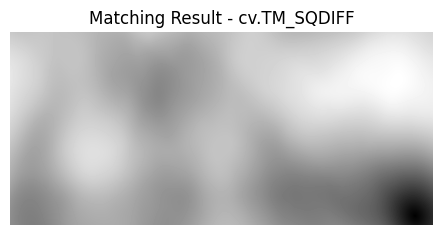

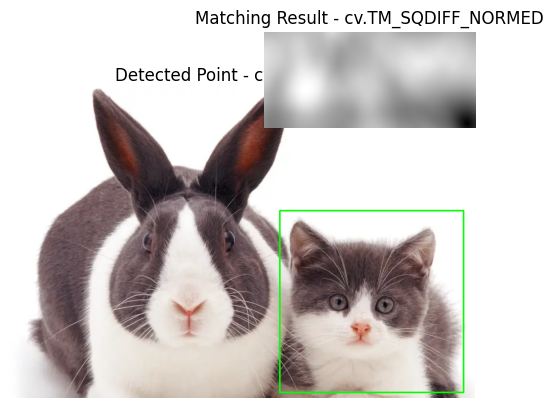

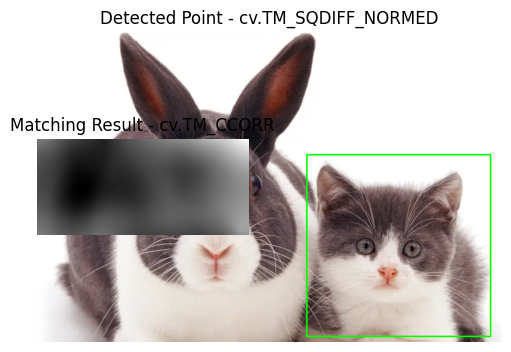

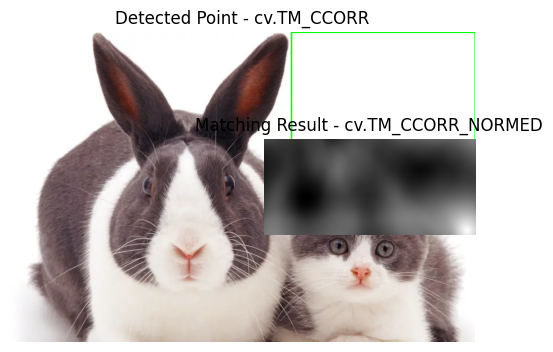

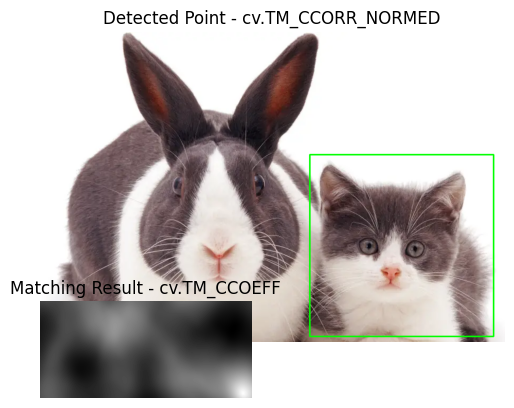

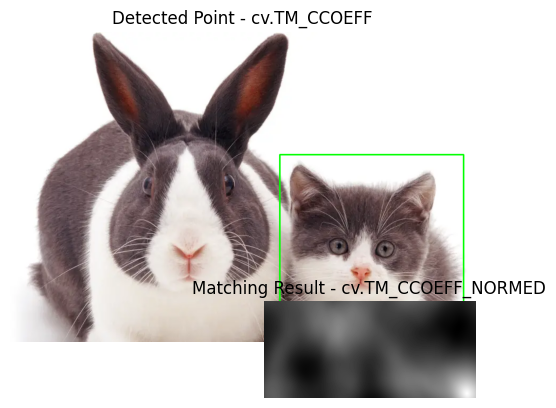

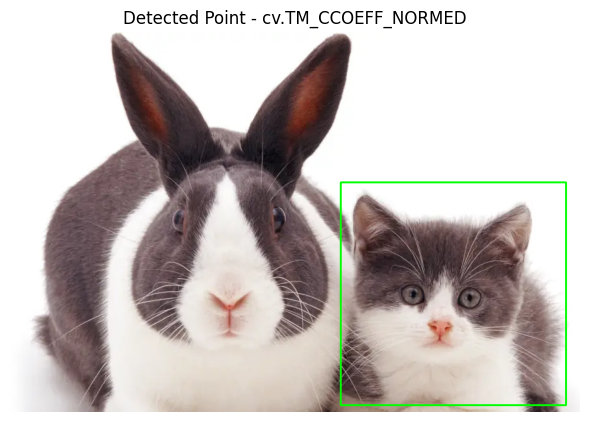

In [ ]:
# Membaca gambar utama dan template
image = cv.imread('/content/drive/MyDrive/Images/cats_and_bunnies.jpg')
template = cv.imread('/content/drive/MyDrive/Images/cats_template.jpg')

# Mengonversi gambar ke grayscale untuk template matching
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

# Menyimpan ukuran template
w, h = template_gray.shape[::-1]

# Daftar metode yang akan diterapkan
methods = [
    'cv.TM_SQDIFF',
    'cv.TM_SQDIFF_NORMED',
    'cv.TM_CCORR',
    'cv.TM_CCORR_NORMED',
    'cv.TM_CCOEFF',
    'cv.TM_CCOEFF_NORMED'
]

# Menampilkan hasil template matching untuk setiap metode
plt.figure(figsize=(12, 10))

for i, method_name in enumerate(methods):
    # Menyimpan metode yang digunakan
    method = eval(method_name)

    # Melakukan template matching
    result = cv.matchTemplate(image_gray, template_gray, method)

    # Menentukan lokasi dengan hasil terbaik
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        min_val, _, min_loc, _ = cv.minMaxLoc(result)
        top_left = min_loc
    else:
        _, max_val, _, max_loc = cv.minMaxLoc(result)
        top_left = max_loc

    # Menentukan posisi kanan bawah dari template yang ditemukan
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Menambahkan kotak pembatas pada gambar
    image_copy = image.copy()
    cv.rectangle(image_copy, top_left, bottom_right, (0, 255, 0), 2)

    # Menampilkan hasil template matching
    plt.subplot(3, 2, i+1)
    plt.imshow(result, cmap='gray')
    plt.title(f'Matching Result - {method_name}')
    plt.axis('off')

    # Menampilkan hasil deteksi pada gambar utama
    plt.figure(figsize=(6, 6))
    plt.imshow(cv.cvtColor(image_copy, cv.COLOR_BGR2RGB))
    plt.title(f'Detected Point - {method_name}')
    plt.axis('off')

plt.tight_layout()
plt.show()